# 3. Napovedovanje aktivnosti struktur na naboru naključnih molekul

In [1]:
%run __A_knjiznice.py

# Import specific elements from the script
from __A_knjiznice import *
from __B_funkcije import *

/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1


In [2]:
directory = '/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1/podatki_napoved'
filepath_train_data = '/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1/molekulski_prstni_odtisi/df_circular.csv'

# Pridobitev naključnih struktur

In [3]:
import modin.pandas as pdm
df = pdm.read_csv('/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1/podatki_napoved/df_with_fingerprints.csv')

# Read the training dataset
df_train = pdm.read_csv(filepath_train_data)

# Extract SMILES strings from the training dataset
trained_smiles = set(df_train['Smiles'])


# Filter out rows that are in the training dataset
df_filtered = df[~df['Smiles'].isin(trained_smiles)]


# Calculate the count of matches excluded
matches_count = len(df) - len(df_filtered)
print(f'Number of matches excluded: {matches_count}')

# Optionally, display the first few rows of the filtered DataFrame
df_filtered

2024-12-02 18:08:57,806	INFO worker.py:1819 -- Started a local Ray instance.
(raylet) Spilled 3942 MiB, 14 objects, write throughput 1821 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
(raylet) Spilled 8420 MiB, 29 objects, write throughput 2526 MiB/s.
(raylet) Spilled 35428 MiB, 122 objects, write throughput 2856 MiB/s. [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(raylet) Spilled 66548 MiB, 396 objects, write throughput 960 MiB/s.


Number of matches excluded: 101


,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,O=C1N(Cc2ccc(s2)S(=O)(=O)N2CCCc3ccccc23)C(=O)c...,Molport-007-763-075,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Cc1ccccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1,Molport-007-763-076,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,COc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-077,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cc1c(Cl)cccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C...,Molport-007-763-078,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,Molport-007-763-079,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318939,Clc1ccc(cc1)-n1c(nc2n(ncc2c1=O)-c1ccccc1)-c1cccs1,Molport-002-191-019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5318940,Cc1cc(Cl)cc(Cl)c1OCC(=O)Nc1ccc(O)c(c1)-c1nc2cc...,Molport-002-191-020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5318941,CCOC(=O)C1=C(Nc2ccc(cc2)[N+]([O-])=O)S\C(=C/c2...,Molport-002-191-021,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5318942,COc1ccc(cc1)-n1nc2ccc(NC(=O)Cc3ccc(Cl)cc3)cc2n1,Molport-002-191-022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(raylet) Spilled 131458 MiB, 643 objects, write throughput 656 MiB/s.


In [5]:
# Prepare the target variable (y) and features (X)
y = df_train['Activity'].values.ravel()  # Assuming 'Activity' is the target
X = df_train.iloc[:, 3:]  # Assuming features start from the 4th column

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Train the model on the entire training dataset
rf.fit(X, y)

# Step 2: Load the new dataset (e.g., test dataset)
df_molport = df_filtered  # Assuming df_filtered_1 is your new dataset

# Prepare the features from the new dataset
X_molport = df_molport.iloc[:, 2:]  # Assuming the same feature structure as the training dataset

# Step 3: Make predictions on the new dataset
y_pred = rf.predict(X_molport)  # Class predictions
y_proba = rf.predict_proba(X_molport)  # Probability predictions

# Add the predicted activity and probability of being active (1) directly to df_molport
df_molport['Predicted_Activity'] = y_pred
df_molport['Probability_Active'] = y_proba[:, 1]  # Probability of being active (1)

df_molport[['Smiles','Predicted_Activity','Probability_Active']]

,Smiles,Predicted_Activity,Probability_Active
0,O=C1N(Cc2ccc(s2)S(=O)(=O)N2CCCc3ccccc23)C(=O)c...,0,0.31
1,Cc1ccccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C2=O)s1,0,0.29
2,COc1cc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,0,0.35
3,Cc1c(Cl)cccc1NS(=O)(=O)c1ccc(CN2C(=O)c3cccnc3C...,0,0.32
4,Cc1ccc(NS(=O)(=O)c2ccc(CN3C(=O)c4cccnc4C3=O)s2...,0,0.41
...,...,...,...
5318939,Clc1ccc(cc1)-n1c(nc2n(ncc2c1=O)-c1ccccc1)-c1cccs1,0,0.24
5318940,Cc1cc(Cl)cc(Cl)c1OCC(=O)Nc1ccc(O)c(c1)-c1nc2cc...,0,0.36
5318941,CCOC(=O)C1=C(Nc2ccc(cc2)[N+]([O-])=O)S\C(=C/c2...,0,0.30
5318942,COc1ccc(cc1)-n1nc2ccc(NC(=O)Cc3ccc(Cl)cc3)cc2n1,0,0.33


In [6]:
# Filter for active predictions (Predicted_Activity == 1) and sort by Probability_Active in descending order
active_results = df_molport[df_molport['Predicted_Activity'] == 1].sort_values(by='Probability_Active', ascending=False)
active_results

,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.000000
3784134,C[C@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=...,Molport-046-417-641,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.990000
3437988,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,Molport-039-330-732,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0.990000
3414216,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,Molport-039-137-699,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0.990000
4219132,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,Molport-047-588-443,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4761910,Cc1ccc(NC(=O)\N=c2\[nH]nc(s2)-c2ccc(F)cc2)cc1C,Molport-000-829-025,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0.502000
2712267,COc1ccc(\C=c2\sc3=NC4(C)Oc5ccccc5C(C4C(=O)Nc4c...,Molport-002-751-463,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.502000
3537719,Cc1ccc(cc1)S(=O)(=O)N1CCCC(CCC(=O)Nc2ccc(F)cc2...,Molport-044-312-453,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.500833
4867336,Fc1ccc(CNC(=O)c2nn3C(CC(Nc3c2Br)c2ccccc2)C(F)(...,Molport-001-498-994,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0.500833


In [7]:
active_results.head(100)

,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.00
3784134,C[C@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=...,Molport-046-417-641,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.99
3437988,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,Molport-039-330-732,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0.99
3414216,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,Molport-039-137-699,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0.99
4219132,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,Molport-047-588-443,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200112,CC(=O)N1CCc2cc(ccc12)S(=O)(=O)Nc1ccc(F)cc1,Molport-002-025-351,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.83
407873,Fc1ccc(NC(=O)C2CCN(CC2)c2c(cnc3ccc(F)cc23)C#N)cc1,Molport-010-672-303,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0.83
487572,COC(=O)c1ccc(NC(=O)c2ccc3N(CCCc3c2)C(=O)c2ccc(...,Molport-010-780-307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0.83
2877313,COc1ccc(cc1OC)C(=O)Nc1ccc2N(CCCc2c1)C(=O)c1ccc...,Molport-002-938-619,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0.83


In [8]:
most_active = active_results.iloc[:1000].copy()
most_active

,Smiles,MOLPORTID,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,...,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1.00
3784134,C[C@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=...,Molport-046-417-641,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.99
3437988,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,Molport-039-330-732,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0.99
3414216,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,Molport-039-137-699,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0.99
4219132,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,Molport-047-588-443,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628003,CCCNC(=O)C1CCN(CC1)c1ccc(SCC(=O)Nc2ccc(F)cc2)nn1,Molport-010-966-520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.76
981889,CC1CCN(CC1)c1ccc2nnc(CCC(=O)Nc3ccc(F)cc3)n2n1,Molport-007-744-502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.76
3017860,Fc1ccc(cc1)S(=O)(=O)N1CCCc2cc(NC(=O)c3ccc(Cl)c...,Molport-003-094-494,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0.76
399206,Cc1ccc(Oc2nccnc2N2CCCC(C2)C(=O)Nc2ccc(F)cc2)cc1,Molport-010-660-145,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.76


In [9]:
# import pandas as pd
# from sklearn.feature_selection import VarianceThreshold
# from imblearn.pipeline import Pipeline as ImbPipeline

# # Assuming calc_fingerprints, remove_collinear_features_simple, sampling_techniques, dim_reduction_methods,
# # classifiers, df, best_fingerprint, best_fs_name, best_dr_name, best_clf_name are defined elsewhere

# # Step 1: Calculate fingerprints
# df_or, X = calc_fingerprints(df_train, best_fingerprint)
# y = df_train['Activity'].values.ravel()  # Ensure y is 1D

# # Step 2: Remove constant features
# selector = VarianceThreshold()
# X = pd.DataFrame(selector.fit_transform(X), columns=selector.get_feature_names_out())

# # Remove collinear features
# X = remove_collinear_features_simple(X, threshold=0.95)

# # Step 3: Configure pipeline steps based on the best options selected
# steps = []
# if best_fs_name not in ('None', 'nan') and not pd.isna(best_fs_name):
#     steps.append(('feature_selection', sampling_techniques[best_fs_name]))
# if best_dr_name not in ('None', 'nan') and not pd.isna(best_dr_name):
#     steps.append(('dim_reduction', dim_reduction_methods[best_dr_name]))
# if best_clf_name not in ('None', 'nan'):
#     steps.append(('Classifier', classifiers[best_clf_name]))

# # Create and fit the pipeline
# best_pipeline = ImbPipeline(steps)
# best_pipeline.fit(X, y)

# # Assuming X_random is prepared similarly to X
# # Step 4: Predict probabilities for the positive class
# y_random_proba = best_pipeline.predict_proba(X_random)[:, 1]  # Get probabilities for the positive class

# # Define a custom threshold
# threshold = 0.5  # You mentioned 50% as the threshold

# # Filter predictions based on the threshold
# above_threshold_indices = y_random_proba >= threshold
# filtered_proba = y_random_proba[above_threshold_indices]
# filtered_smiles = df_filtered_1['Smiles'][above_threshold_indices]

# df_predictions_adjusted = pd.DataFrame({'Smiles': filtered_smiles, 'Probability': filtered_proba})

# # Print probabilities of the predictions above the threshold
# for smile, proba in zip(filtered_smiles, filtered_proba):
#     print(f"SMILE: {smile}, Probability: {proba}")

# # Display the resulting DataFrame
# df_predictions_adjusted


In [15]:
def is_pains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    # Initialize PAINS filter catalog
    params = FilterCatalogParams()
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_B)
    params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_C)
    catalog = FilterCatalog.FilterCatalog(params)
    
    # Check for PAINS
    entry = catalog.GetFirstMatch(mol)
    return 1 if entry is not None else 0

# Apply the PAINS filter function to the 'Smiles' column
most_active['is_pains'] = most_active['Smiles'].apply(is_pains)

# Filter out PAINS molecules
df_filtered_1 = most_active[most_active['is_pains'] == 0].drop(columns=['is_pains'])

most_active_filtered = df_filtered_1[['Smiles','MOLPORTID','Predicted_Activity','Probability_Active']].copy()
most_active_filtered

,Smiles,MOLPORTID,Predicted_Activity,Probability_Active
2007716,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,Molport-047-919-460,1,1.00
3784134,C[C@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=...,Molport-046-417-641,1,0.99
3437988,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,Molport-039-330-732,1,0.99
3414216,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,Molport-039-137-699,1,0.99
4219132,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,Molport-047-588-443,1,0.99
...,...,...,...,...
1628003,CCCNC(=O)C1CCN(CC1)c1ccc(SCC(=O)Nc2ccc(F)cc2)nn1,Molport-010-966-520,1,0.76
981889,CC1CCN(CC1)c1ccc2nnc(CCC(=O)Nc3ccc(F)cc3)n2n1,Molport-007-744-502,1,0.76
3017860,Fc1ccc(cc1)S(=O)(=O)N1CCCc2cc(NC(=O)c3ccc(Cl)c...,Molport-003-094-494,1,0.76
399206,Cc1ccc(Oc2nccnc2N2CCCC(C2)C(=O)Nc2ccc(F)cc2)cc1,Molport-010-660-145,1,0.76


Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


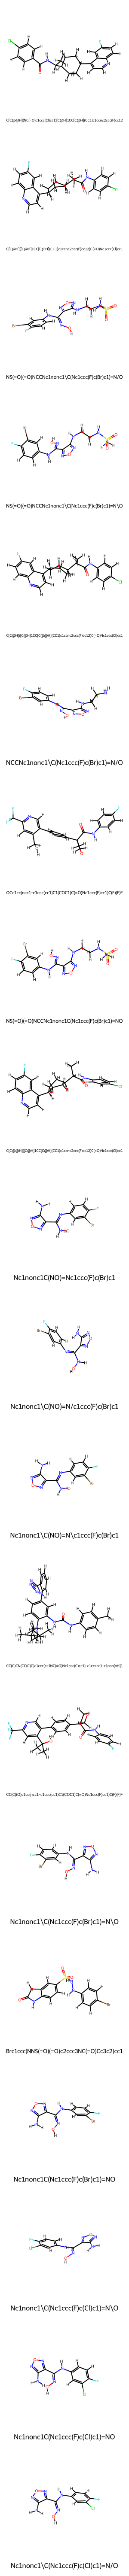

In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Select the first five SMILES and convert to a list
smiles_list = most_active_filtered['Smiles'].head(20).tolist()

# Convert SMILES to RDKit Mol objects and generate 3D structures
molecules = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Add hydrogens
        mol = Chem.AddHs(mol)
        # Generate 3D coordinates
        AllChem.EmbedMolecule(mol, randomSeed=0xf00d)
        AllChem.UFFOptimizeMolecule(mol)
        molecules.append(mol)

# Draw the molecules with SMILES as labels in separate rows
img = Draw.MolsToGridImage(molecules, molsPerRow=1, subImgSize=(300, 300), legends=smiles_list)

# Display the image
img

In [17]:
# Print out the first 20 SMILES
print("First 20 SMILES:")
for smiles in smiles_list:
    print(smiles)

First 20 SMILES:
C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12
C[C@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=O)Nc1ccc(Cl)cc1
NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O
NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O
C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(=O)Nc1ccc(Cl)cc1
NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O
OCc1cc(ncc1-c1ccc(cc1)C1(COC1)C(=O)Nc1ccc(F)cc1)C(F)(F)F
NS(=O)(=O)NCCNc1nonc1C(Nc1ccc(F)c(Br)c1)=NO
C[C@@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=O)Nc1ccc(Cl)cc1
Nc1nonc1C(NO)=Nc1ccc(F)c(Br)c1
Nc1nonc1\C(NO)=N/c1ccc(F)c(Br)c1
Nc1nonc1\C(NO)=N\c1ccc(F)c(Br)c1
CC(C)CN(CC(C)C)c1ccc(cc1NC(=O)Nc1ccc(C)cc1)-c1ccccc1-c1nnn[nH]1
CC(C)(O)c1cc(ncc1-c1ccc(cc1)C1(COC1)C(=O)Nc1ccc(F)cc1)C(F)(F)F
Nc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O
Brc1ccc(NNS(=O)(=O)c2ccc3NC(=O)Cc3c2)cc1
Nc1nonc1C(Nc1ccc(F)c(Br)c1)=NO
Nc1nonc1\C(Nc1ccc(F)c(Cl)c1)=N\O
Nc1nonc1C(Nc1ccc(F)c(Cl)c1)=NO
Nc1nonc1\C(Nc1ccc(F)c(Cl)c1)=N/O


In [18]:
df_filtered_1.to_csv('/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1/podatki_napoved/most_active_filtered.csv', index=False)